# Demo día 2

René Delgado Servín
7 de agosto 2024

En este demo vamos a crear una rede neuronal(CNN) sencilla de una capa, que predice si un alumno va a pasar o no.

Estas redes neuronales usarán de entrada unicamente la cantidad de sesiones a las cuales el alumno asistió y la cantidad de horas que el alumno invirtió en la realización de su proyecto final.

Los datos son simulados.


## Importaciones

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random as rn
import matplotlib.pyplot as plt
rn.seed(20)

## Datos

Los datos va a generarse conciderando un curso hipotético con duración de 10 sesiones y 60 alumnos. Los alumnos pueden tener calificaciones de 0 a 10, si tienen menos de 6 de calificación reprueban si tienen 6 o más de calificación pasan.

Para simular un alumno se genera un tiempo en proyecto final de 0 a 12 hrs aleatorio y una cantidad aleatoria de sesiones asistidas entre 1 y 10. Para determinar la calificacion, se toman el numero de horas usadas en proyecto final y se le suman la menor de las cantidades entre el número de horas usadas y las sesiones asistidas, finalmente la suma se divide entre 12, se multiplica por 10 y se redondea a dos decimales, si la cantidad obtenida se pasa de 10 se colocara un 10. Simulando que un alumno tiene que invertir 12 horas en su proyecto final como mínimo para sacar 10, y si el alumno asistió a una sesión y tiene una hora que puede invertir en trabajar después de la sesión entonces esa hora vale por dos para su proyecto final, porque tiene los conocimientos de la clase frescos.

In [2]:
#funcion para determinar una calificacion
def calificacion(horas,sesiones):
   horasefectivas = horas + min(horas,sesiones)
   calif = round(horasefectivas * 10 / 12,2)
   if calif > 10: return 10
   return calif

In [3]:
# funcion para generar un array con los datos de un alumno particular aleatorio
def alumnoAleatorio():
   hrs = rn.randint(0,12) # horas invertidas del alumno
   sesiones = rn.randint(1,10) # sesiones asistidas del alumno
   calif = calificacion(hrs,sesiones)# calificacion del alumno
   aprobo = 1 if calif >=6 else 0 # aprobo o no
   return [hrs,sesiones,calif,aprobo]



In [4]:
listaAlumnosEntrenamiento = [alumnoAleatorio() for i in range(50)] #listado de alumnos que vamos a usar para entrenar el clasificador
listaAlumnosPrueba = [alumnoAleatorio() for i in range(10)] #alumnos con los cuales vamos a validar el clasificador

In [5]:
# dataframe con los datos de los alumnos
dfAlumnos = pd.DataFrame(listaAlumnosEntrenamiento,columns=['horasInvertidas', 'sesionesAsistidas','calificacion','aprobo'])

In [6]:
dfAlumnos.describe()

,horasInvertidas,sesionesAsistidas,calificacion,aprobo
count,50.000000,50.000000,50.000000,50.000000
mean,4.940000,5.180000,6.166800,0.540000
std,3.460624,3.001292,3.337298,0.503457
min,0.000000,1.000000,0.000000,0.000000
25%,2.000000,2.250000,3.330000,0.000000
50%,4.000000,5.000000,6.670000,1.000000
75%,7.000000,7.000000,10.000000,1.000000
max,12.000000,10.000000,10.000000,1.000000


In [7]:
dfAlumnos.aprobo.value_counts()

aprobo
1    27
0    23
Name: count, dtype: int64

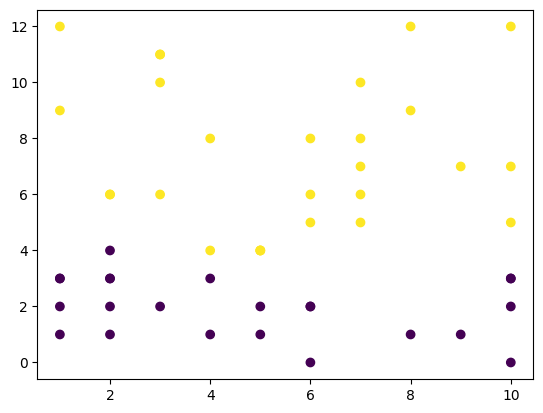

In [8]:
#visualizamos nuestra informacion
plt.scatter(dfAlumnos.sesionesAsistidas,dfAlumnos.horasInvertidas,c = dfAlumnos.aprobo )

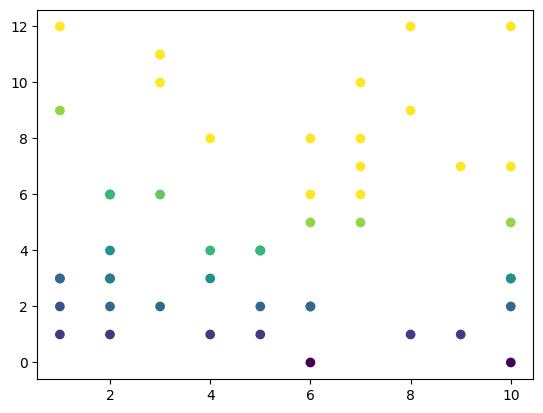

In [9]:
plt.scatter(dfAlumnos.sesionesAsistidas,dfAlumnos.horasInvertidas,c = dfAlumnos.calificacion)

In [10]:
dfAlumnosPrueba = pd.DataFrame(listaAlumnosPrueba,columns=['horasInvertidas', 'sesionesAsistidas','calificacion','aprobo'])

## Clasificador

Constantes

In [11]:
BATCH_SIZE = 5 # tamaño de bache
EPOCHS = 10 #iteraciones de propagación sobre todos los datos de entrenamiento
LEARNING_RATE = .001# velocidad de aprendizaje

Generamos el modelo con una capa oculta de 100 neuronas.

In [12]:
clasificadorModel = tf.keras.Sequential([
   tf.keras.layers.Dense(100,activation="linear"),#capa oculta de 100 neuronas con activación lineal 
   tf.keras.layers.Dense(1,activation='sigmoid') #capa de salida, activación sigmoid para devolver 0 o 1 
])

Definimos el optimizador

In [13]:
optimizador = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)#puedes usar el optimzador de tu preferencia

Compilamos

In [14]:
clasificadorModel.compile(
   optimizer = optimizador,
   loss = 'binary_crossentropy',#la funcion de perdidam, en este caso binary_crossentropy debido a ques es una clasificacion de 0 o 1
   metrics = ['accuracy'] #metricas que queremos obtener en el entrenamiento, en este caso presición
)

Entrenamos

In [15]:
historiaDeEntrenamientoClasificador = clasificadorModel.fit(x=dfAlumnos.drop(columns=["calificacion","aprobo"]),y=dfAlumnos.aprobo,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(dfAlumnosPrueba.drop(columns=["calificacion","aprobo"]),dfAlumnosPrueba.aprobo))

Epoch 1/10
10/10 [==============================] - 1s 23ms/step - loss: 1.0601 - accuracy: 0.5400 - val_loss: 0.6752 - val_accuracy: 0.6000
Epoch 2/10
10/10 [==============================] - 0s 6ms/step - loss: 0.7448 - accuracy: 0.5400 - val_loss: 0.5943 - val_accuracy: 0.6000
Epoch 3/10
10/10 [==============================] - 0s 7ms/step - loss: 0.5913 - accuracy: 0.6400 - val_loss: 0.4486 - val_accuracy: 0.8000
Epoch 4/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4960 - accuracy: 0.7800 - val_loss: 0.3638 - val_accuracy: 0.8000
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4406 - accuracy: 0.8400 - val_loss: 0.3292 - val_accuracy: 0.8000
Epoch 6/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4129 - accuracy: 0.8400 - val_loss: 0.3241 - val_accuracy: 0.8000
Epoch 7/10
10/10 [==============================] - 0s 5ms/step - loss: 0.3930 - accuracy: 0.8400 - val_loss: 0.3110 - val_accuracy: 0.8000
Epoch 8/10
10/10 [=

Text(0.5, 0, 'iteracion')

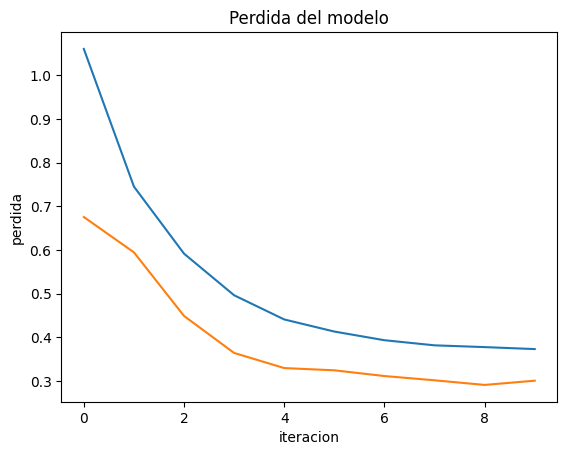

In [16]:
plt.plot(historiaDeEntrenamientoClasificador.history['loss'])   
plt.plot(historiaDeEntrenamientoClasificador.history['val_loss'])   
plt.title('Perdida del modelo')  
plt.ylabel('perdida')  
plt.xlabel('iteracion')  